## Exploratory Data Analysis on the Most Streamed Spotify Songs of 2023 by Bon-ao, Angelo B.

#### This code entails an exploratory data analysis on the most streamed spotify songs of 2023. 
#### It includes exploring, cleaning, and visualizing the data it contains.

---

### Preparation/Pre-processing for EDA

#### Importing necessary libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### These libraries are needed in order to perform EDA on the given dataset;
##### The pandas library will make it so that the dataset from the csv file is read and turned into a dataframe.
##### It'll also allow us to use commands that is needed for the EDA.
#####
##### The matplotlib.pyplot library will allow us to visualize the data and highlight the stories within the data.
##### 
##### The seaborn library serves the same purpose as matplotlib.pyplot but carries an extra feature that colors the visualizations.
---

#### Loading/Reading the data as a dataframe

In [9]:
df_spotify = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##### To load the given dataset, which is a csv file, the pd.read_csv is used
##### The encoding='ISO-8859-1' is also implemented as it would not load the file without it
#####
##### It would also seem that multiple artists are credited for a number of songs so they must be seperated and each have their own row
---

#### Viewing/Checking the data

In [12]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

##### Using .info() acquires the basic information of the data
##### There are 953 rows and 24 columns. 
##### The datatype for the streams in_deezer_playlists, and in_shazam_charts attributes are also incorrectly detected as an object
---

### Cleaning/Fixing the dataset

#### Fixing the datatypes for streams, in_deezer_playlists, and in_shazam_charts

##### For the streams attribute

In [17]:
df_spotify['streams'].iloc[574]

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [18]:
df_spotify['streams'] = pd.to_numeric(df_spotify['streams'], errors = 'coerce')
df_spotify['streams']

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 953, dtype: float64

In [19]:
df_spotify['streams'].iloc[574]

nan

##### Used errors = 'coerce' as without it, it wouldn't be able to convert the 574th row in to a numerical value
##### The value of the 574th row of streams is converted to Nan and is now missing
##### It used to store the values of the other columns related to the row of the song which was 'Love Grows (Where My Rosemary Goes)' by Edison Lighthouse
##### It used to have 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'
#####
##### Upon researching, the original song has about 276,093,748	accumulated streams and is being streamed daily by 168,328 on 2024/10/16 which was 290 days since 2023
##### Subtracting 276,093,748 by 168,000 multiplied by 290 to account for the extra days, we get 227,373,748 streams
##### We should now store this value in that row as done below,

In [21]:
df_spotify.at[574, 'streams'] = 227373748
df_spotify['streams'].iloc[574]

227373748.0

#### For the in_deezer_playlists attribute

In [23]:
df_spotify['in_deezer_playlists'] = df_spotify['in_deezer_playlists'].str.replace(",","").astype(float)
df_spotify['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 953, dtype: float64

##### The in_deezer_playlists contains numbers with commas and it is the reason it detected as an object
##### replacing all the commas with a space using .str.replace(","") ensuring that it can be all converted into numerical values
##### The astype(float) is used to convert all the values in to column to become the float datatype
#####

#### For the in_shazam_charts

##### It has the same problem with the 'in_deezer_playlists' column so we just need to repeat the process before

In [27]:
df_spotify['in_shazam_charts'] = df_spotify['in_shazam_charts'].str.replace(",","").astype(float)
df_spotify['in_shazam_charts']

0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
       ...  
948      0.0
949      0.0
950      0.0
951      0.0
952      0.0
Name: in_shazam_charts, Length: 953, dtype: float64

---
#### Handling duplicate tracks & values

##### To check for duplicates the .duplicated command is used and since there are no exact duplicate of rows, only track names and artists,
##### the .duplicated command has an added condition as (['track_name','artist(s)_name'])]
#####

In [30]:
duplicate_tracks = df_spotify[df_spotify.duplicated(['track_name','artist(s)_name'])]

print("The duplicate tracks that is in the dataseet are ")
print()
print(duplicate_tracks)

The duplicate tracks that is in the dataseet are 

           track_name artist(s)_name  artist_count  released_year  \
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
482              10            31                   573                  0   
616               8             6                  6392                  0   
764               4            14                  9021                  0   
873               3            19                  1818                  0   

         streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
482  301869854.0                   1  ...  166   C#  Major              70   
616  432702334.0                 174  ...  121   G#  Maj

#####
##### The duplicated tracks are probably due to re-releases and source data anomalies such as data entry errors or data collection methods
##### Since the duplicated tracks are only 4, these tracks should be dropped and the their first instance should be kept
#####

In [32]:
df_spotify = df_spotify.drop_duplicates(["track_name","artist(s)_name"])
duplicate_tracks = df_spotify[df_spotify.duplicated(["track_name","artist(s)_name"])]
print(duplicate_tracks)

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []

[0 rows x 24 columns]


---
#### Handling Missing Values

##### To check for missing values, .isna() returns a bool value, it returns true if the value in a specific column is missing or null
##### .sum() makes it so that it counts all the times .isna() returns true in their respective columns
##### VTo see the specific columns that have missing values, the missing_values>0 condition is used so it only prints those who have missing values

In [35]:
missing_values = df_spotify.isna().sum()

print("The columns that have missing values in the dataset are ")
print()
print(missing_values[missing_values>0])

The columns that have missing values in the dataset are 

in_shazam_charts    50
key                 94
dtype: int64


##### Since the missing values are lesser than 10% of the population, we may use imputation methods to replace them.
##### Except for the cases of the missing values of the key column as they are specific to their own song, an object datatype, and almost has 10% missing
##### We will drop the rows with missing key values
##### 
##### Upon further research, it would seem that most data analysis algorithms/software assumes that data are missing completely at random.
##### For the missing values in the in_shazam_charts, I opted to use the median imputation method 
##### as it makes the assumption that the data is missing completely at random

In [37]:
df_spotify.dropna(subset=['key'], inplace=True)

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_34432\3622115646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify.dropna(subset=['key'], inplace=True)


In [38]:
missing_values = df_spotify.isna().sum()
print("The updated missing values are now ")
print()
print(missing_values[missing_values>0])

The updated missing values are now 

in_shazam_charts    41
dtype: int64


##### Now that the rows with missing key values are gone, the missing values for in_shazam_charts have also lessened
##### Making the median imputation safer to execute as it will have less impact to the entire population while retaining the song's other factors

In [40]:
shazam_median = df_spotify['in_shazam_charts'].median()
f"The median value of the 'in_shazam_charts' is {shazam_median}"

"The median value of the 'in_shazam_charts' is 2.5"

In [41]:
df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_34432\3851771827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)
C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_34432\3851771827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['in_shazam_charts'].filln

##### .fillna() is used to fill all nan values with something else such as the shazam_median,
##### and inplace=True makes it so that the action is done to the original dataframe and not in a seperate copy
##### Lastly, we should reset the index as many rows were dropped from the original dataframe

In [43]:
df_spotify = df_spotify.reset_index(drop=True)

In [44]:
df_spotify.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [45]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            855 non-null    object 
 1   artist(s)_name        855 non-null    object 
 2   artist_count          855 non-null    int64  
 3   released_year         855 non-null    int64  
 4   released_month        855 non-null    int64  
 5   released_day          855 non-null    int64  
 6   in_spotify_playlists  855 non-null    int64  
 7   in_spotify_charts     855 non-null    int64  
 8   streams               855 non-null    float64
 9   in_apple_playlists    855 non-null    int64  
 10  in_apple_charts       855 non-null    int64  
 11  in_deezer_playlists   855 non-null    float64
 12  in_deezer_charts      855 non-null    int64  
 13  in_shazam_charts      855 non-null    float64
 14  bpm                   855 non-null    int64  
 15  key                   8

---
### Overview of Dataset

##### At first, the dataset had about 953 rows and 24 columns. After pre-processing/preparation of the data, 
##### it resulted in the final size of 1324 rows and the same number of columns
#####
##### The datatypes of each column turned out to be either a 64bit integer or an object but some categories were incorrectly labeled as an object
##### Such as the streams, in_deezer_playlists, and in_shazam_charts. After pre-processing/preparation of the data,
##### The three became all 64-bit float datatype
#####
##### At first, after handling all the duplicate tracks
##### there were missing values in the streams column, in_shazam_charts, key columns
##### The missing value in the streams column got replaced by a rough estimate
##### All the rows that has a missing key were dropped
##### Lastly, the rest of missing values in the in_shazam_charts got replaced by the median of the column
---

### Basic Descriptive Statistics

In [49]:
f"The mean of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].mean()}"

'The mean of the total streams of the most streamed spotify songs of 2023 is 513116313.88187134'

In [50]:
f"The median of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].median()}"

'The median of the total streams of the most streamed spotify songs of 2023 is 284785823.0'

In [51]:
f"The standard deviation of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].std()}"

'The standard deviation of the total streams of the most streamed spotify songs of 2023 is 572140128.9326662'

##### The mean being way higher than the median indicates that the songs with greater streams dominate the calculations of the mean and
##### it also probably increased due to splitting of track rows that are credited to multiple artists
##### 
##### Let us check the 10 highest streamed song on Spotify 2023 by ordering the dataset starting from the greatest to least streams for easier analysis

In [53]:
df_spotify.sort_values(by=['streams'], ascending=False)
df_spotify['streams'].head(10)

0    141381703.0
1    133716286.0
2    140003974.0
3    800840817.0
4    303236322.0
5    183706234.0
6    725980112.0
7     58149378.0
8     95217315.0
9    553634067.0
Name: streams, dtype: float64

##### It can be seen that the two highest streamed song is doubled due to it having two artists credited
##### The 9th most streamed song is also doubled
#####
##### The standard deviation further suggest that the outliers, whether above or below the mean, significantly influences the calculated mean
##### It would seem that the higher/large outliers influence the mean of the streams greatly more than others.

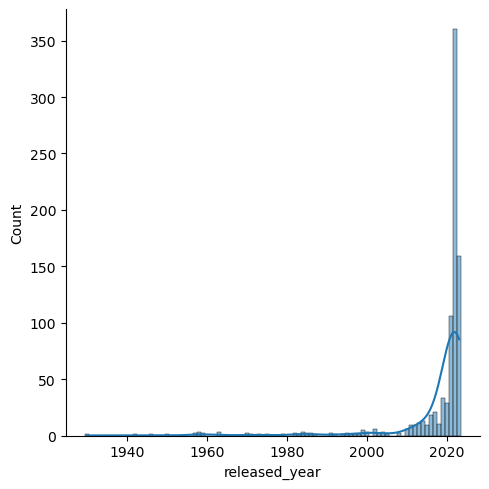

In [177]:
sns.displot(df_spotify, x='released_year', kde=True, discrete=True)
# Bins make it so that it zooms in to the bar values
# kde or Kernel density estimation makes it so that the trend is of the values is easily more identifiable
# The kde is also smooth which suggest a direct correlation

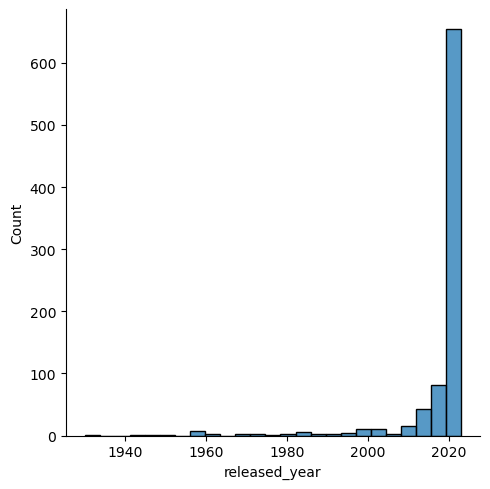

In [175]:
sns.displot(df_spotify, x='released_year', bins=25)

##### It would seem the most streamed spotify songs of 2023 are mostly from the 2020's
##### This makes sense as trendy and topical music gets played over and over as they are newly released
##### It would also seem that the distribution of the released year of the song follows recency bias, except for some goldies and some retro songs of the 2000's

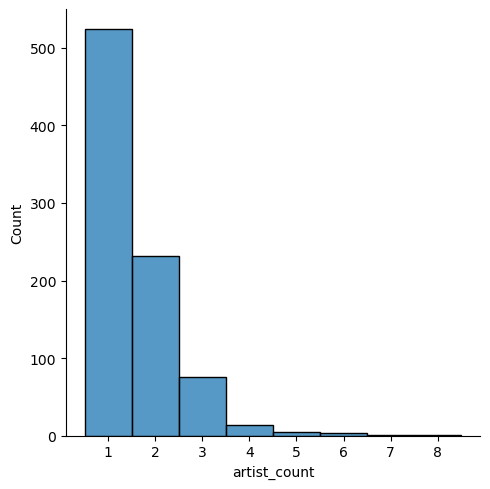

In [148]:
sns.displot(df_spotify, x='artist_count', discrete=True)

##### It would seem that the most streamed spotify songs of 2023 were made by a single artist 
##### The more artists are credited to a song, the less likely it would make the list of the most streamed spotify songs of 2023
---

### Top Performers

##### To track the top performers, we must first seperate all the tracks that have multiple credited artists
##### This would make it so that each artist would have their own rows of the respective tracks
##### This is to adjust and accumulate all the streams for each artist

In [182]:
df_spotify['artist(s)_name'] = df_spotify['artist(s)_name'].str.split(',')
df_spotify['artist(s)_name']
##### turns all the artists into a list and splits 

0         [Latto,  Jung Kook]
1               [Myke Towers]
2            [Olivia Rodrigo]
3              [Taylor Swift]
4                 [Bad Bunny]
                ...          
850            [Selena Gomez]
851            [Taylor Swift]
852     [Feid,  Paulo Londra]
853    [Feid,  Sech,  Jhayco]
854               [Burna Boy]
Name: artist(s)_name, Length: 855, dtype: object